## Deployment Beta Check-In
The eval.py would downscale all images to 224x224 and generate corresponding masks for semantic segmentation. It would save 3 files to the `./tmp/Greenspace/result/` for each input image. For example, for input image `xxxx.png`, the eval.py would save a downscaled image `xxxx.png`, a image mask `xxxx_mask.png`, and a numpy format mask `xxxx_pred.npy`. 

Generate the result files by running the following code:

In [49]:
! rm ./tmp/Greenspace/result/*

In [52]:
! python eval_50m.py semseg greenspace 0 SegForestNet MobileNetv2 --cpu

/projectnb/ds549/students/hjc5283/SegForestNet/python eval_50m.py semseg greenspace 0 SegForestNet MobileNetv2 --cpu
parsing configuration file '/projectnb/ds549/students/hjc5283/SegForestNet/cfgs/semseg.yaml'
sh: nvidia-smi: command not found
num_classes 8
i: 0 trees: namespace(num_features=namespace(shape=8, content=16), outputs=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), graph='BSPTree(2, Line)')
tree_map (0, 0, 0, 0, 0, 0, 0, 0)
James Otis_pred
James P Timilty Middle_pred
James J Chittick_pred
Richard J Murphy_pred
Joseph P Tynan_pred
Blackstone_pred
Curtis Guild_pred
John D Philbrick_pred
Michael J Perkins_pred
Higginson_pred
Joseph J Hurley_pred
Mission Hill School_pred
Rafael Hernandez_pred
Another Course To College_pred
Warren-Prescott_pred
Oliver Hazard Perry_pred
East Boston Early Childhood Center_pred
Samuel W Mason_pred
Carter School_pred
Charlestown High_pred
Hugh Roe O'Donnell_pred
Community Academy_pred
Haynes Early Education Center_pred
Curley K-8 School_pred
Edward M

Showing some of the results:

In [45]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
def displayResult(filename, filepath="./tmp/Greenspace/result/"):
    maskfile = ''.join([*filename.split('.')[:-1], '_mask.', *filename.split('.')[-1:]])
    fig, axs = plt.subplots(1, 2, figsize=(8, 16))
    axs[0].imshow(np.asarray(Image.open(filepath + filename)))
    axs[0].set_axis_off()
    axs[1].imshow(np.asarray(Image.open(filepath + maskfile)))
    axs[1].set_axis_off()
    fig.tight_layout()
    plt.show()

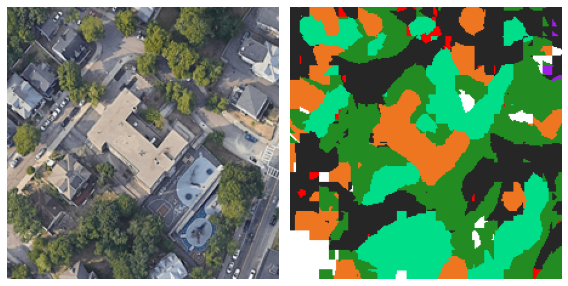

In [53]:
# model 018
displayResult('Higginson.png')

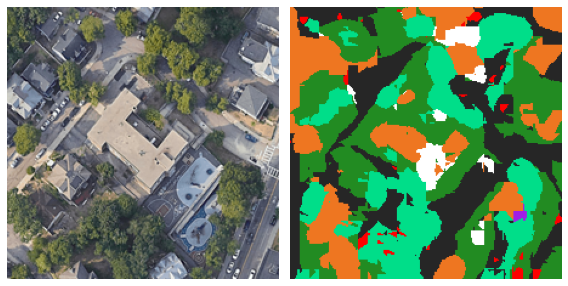

In [51]:
# model 064
displayResult('Higginson.png')

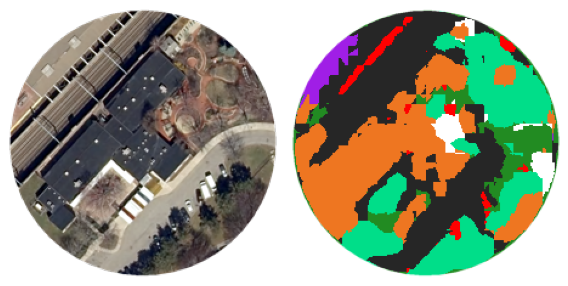

In [5]:
displayResult('Carter_Development_Center.png')

In [6]:
import math
import PIL.Image
import numpy as np
csv_file = 'school_50m_seg.csv'
notation = ["void","impervious_surface","building","low_vegetation","tree","car","water","sports_venues",]

In [7]:
def calculate(filename, result_path='./tmp/Greenspace/result/'):
    result_npy = ''.join([*filename.split('.')[:-1], '_pred.npy'])
    img = PIL.Image.open(result_path + filename)
    origin = np.asarray(img)[:,:,3] / 255
    pred   = np.load(result_path + result_npy)
    print(filename + ":")
    origin = origin.flatten()
    pred   = pred.flatten()
    total_pixel = origin.sum()
    count_pixel = [0] * len(notation)
    for i in range(len(notation)):
        count_pixel[i] += origin[np.where(pred == i)].sum()
    for i in range(len(notation)):
        count_pixel[i] = count_pixel[i] / total_pixel
        # print("%20s:%6.2f%%" % (notation[i], count_pixel[i]))
    return count_pixel

In [8]:
import os
all_files = os.listdir('./tmp/Greenspace/School_50m/')
len(all_files)

133

In [9]:
import csv
with open(csv_file, 'w') as file:
    writer = csv.writer(file)
    writer.writerow(["School_Name", 
                     "Area_50m_Concrete_percent", "Area_50m_Concrete_sqm", 
                     "Area_50m_Building_percent", "Area_50m_Building_sqm", 
                     "Area_50m_LowVege_percent", "Area_50m_LowVege_sqm", 
                     "Area_50m_Tree_percent", "Area_50m_Tree_sqm", 
                     "Area_50m_Water_percent", "Area_50m_Water_sqm", ])
    for e in all_files:
        ratio = calculate(e)
        row = [''.join(e.split('.')[:-1]), ]
        for i in [1, 2, 3, 4, 6, ]:
            row.append(ratio[i] * 100.0)
            row.append(ratio[i] * 50 ** 2 * math.pi)
        writer.writerow(row)

Kennedy,_Patrick_Elementa.png:
Ellis,_David_A__Elementar.png:
Blackstone,_William_Eleme.png:
Otis,_James_Elementary_50.png:
Community_Academy_of_Scie.png:
Curley_K8_Lower_School_50.png:
Madison_Park_Technical_Vo.png:
Boston_Green_Academy__50m.png:
Boston_Teachers_Union_K8_.png:
Horace_Mann_School_for_th.png:
Mendell,_Ellis_Elementary.png:
Beethoven,_Ludwig_Van_Ele.png:
Mission_Hill_K8__50m.png:
Jackson_Mann_K8__50m.png:
Grew,_Henry_Elementary_50.png:
Brighton_High_50m.png:
Umana_Academy,_Mario_K8_5.png:
Community_Academy_50m.png:
Edwards,_Clarence_R__Midd.png:
Kilmer,_Joyce_K8_Lower_Sc.png:
West_Zone_Early_Learning_.png:
Quincy,_Josiah_Upper_Scho.png:
UP_Academy_Holland_50m.png:
ODonnell,_Hugh_R__Element.png:
Perkins,_Michael_J__Eleme.png:
Quincy,_Josiah_Elementary.png:
Channing,_William_E__Elem.png:
Boston_Community_Leadersh.png:
Philbrick,_John_D__Elemen.png:
Hernandez,_Rafael_K8_50m.png:
Harvard_Kent_Elementary_5.png:
Ohrenberger,_William_H__K.png:
Conley,_George_H__Element.png:
Ada

In [10]:
import pandas as pd
df = pd.read_csv(csv_file)
df.head()

,School_Name,Area_50m_Concrete_percent,Area_50m_Concrete_sqm,Area_50m_Building_percent,Area_50m_Building_sqm,Area_50m_LowVege_percent,Area_50m_LowVege_sqm,Area_50m_Tree_percent,Area_50m_Tree_sqm,Area_50m_Water_percent,Area_50m_Water_sqm
0,"Kennedy,_Patrick_Elementa",51.353872,4033.323642,24.039889,1888.088459,5.207927,409.029607,15.473146,1215.258023,0.0,0.0
1,"Ellis,_David_A__Elementar",42.673967,3351.605550,21.292372,1672.298949,13.428550,1054.675839,19.391205,1522.981689,0.0,0.0
2,"Blackstone,_William_Eleme",38.862666,3052.266631,24.737393,1942.870282,13.238130,1039.720274,17.907136,1406.423145,0.0,0.0
3,"Otis,_James_Elementary_50",44.975342,3532.355066,28.053452,2203.312993,6.243295,490.347262,15.632192,1227.749465,0.0,0.0
4,Community_Academy_of_Scie,45.677275,3587.484817,26.534471,2084.012453,7.153933,561.868603,14.955684,1174.616659,0.0,0.0
